In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Exploracion de la data

In [69]:
data = pd.read_csv("new_books_per_mill.csv")
data.head()

,Entity,Code,Year,Book titles per capita (Fink-Jensen 2015)
0,Belgium,BEL,1500,25.6
1,France,FRA,1500,351.764.705.882.353
2,Germany,DEU,1500,4.523.809.523.809.520
3,Ireland,IRL,1500,0
4,Italy,ITA,1500,6.530.000.000.000.000


In [70]:
# Tamaño del archivo
data.shape

(8312, 4)

In [71]:
# Revision de null
data.isna().sum()

Entity                                       0
Code                                         0
Year                                         0
Book titles per capita (Fink-Jensen 2015)    0
dtype: int64

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8312 entries, 0 to 8311
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Entity                                     8312 non-null   object
 1   Code                                       8312 non-null   object
 2   Year                                       8312 non-null   int64 
 3   Book titles per capita (Fink-Jensen 2015)  8312 non-null   object
dtypes: int64(1), object(3)
memory usage: 259.9+ KB


In [73]:
data['Book titles per capita (Fink-Jensen 2015)'] = data['Book titles per capita (Fink-Jensen 2015)'].str.replace('.', '').astype(float)

Análisis

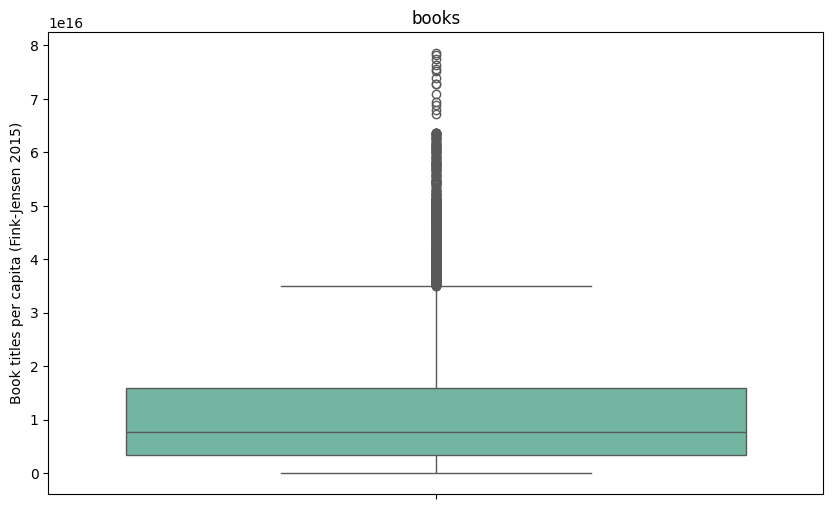

In [74]:
# Busqueda de datos atipicos
plt.figure(figsize=(10,6))
sns.boxplot(data=data, y='Book titles per capita (Fink-Jensen 2015)')
plt.title('books')
plt.show()

In [75]:
# Metodo IQR 
Q1 = data['Book titles per capita (Fink-Jensen 2015)'].quantile(0.25)
Q3 = data['Book titles per capita (Fink-Jensen 2015)'].quantile(0.75)
IQR = Q3 - Q1

# limites superiores e inferiores
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filtrado de la data 
filtered_data = data[(data['Book titles per capita (Fink-Jensen 2015)']>=lower_bound)& (data['Book titles per capita (Fink-Jensen 2015)'] <= upper_bound)]

# display
outliers_removed = data[~data.index.isin(filtered_data.index)]
print(f'lo removido: \n {outliers_removed}')

lo removido: 
            Entity Code  Year  Book titles per capita (Fink-Jensen 2015)
5     Netherlands  NLD  1500                               3.954580e+16
7           Spain  ESP  1500                               7.560000e+16
65    Netherlands  NLD  1505                               4.603818e+16
90         Poland  POL  1507                               4.922507e+16
93    Switzerland  CHE  1507                               3.777109e+16
...           ...  ...   ...                                        ...
8248       Norway  NOR  2001                               3.826634e+16
8264       Norway  NOR  2003                               3.817008e+16
8272       Norway  NOR  2004                               3.541324e+16
8286       Norway  NOR  2006                               3.959382e+16
8293       Norway  NOR  2007                               3.755246e+16

[743 rows x 4 columns]


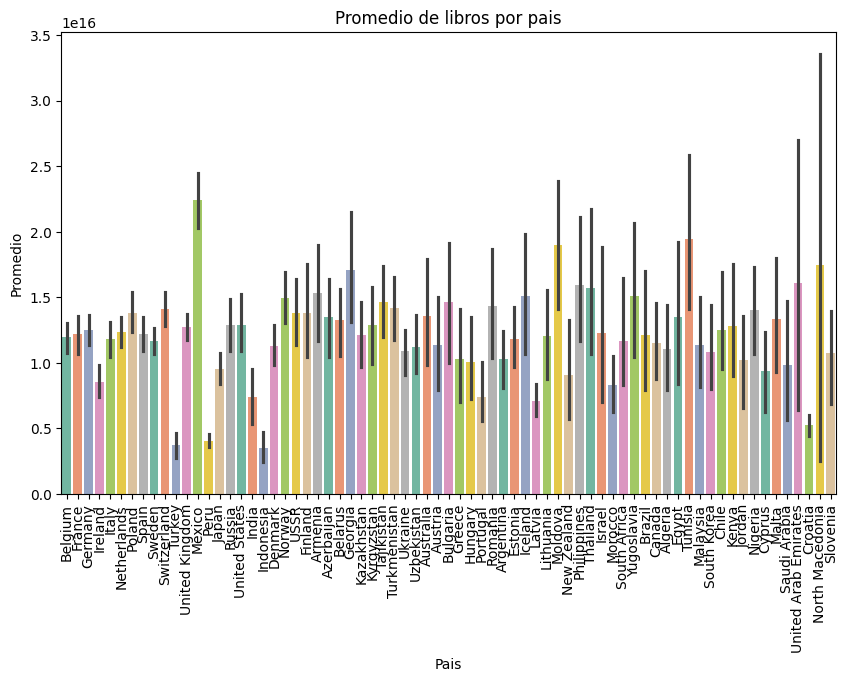

In [76]:
#promedio de libros por pais
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='Entity', y='Book titles per capita (Fink-Jensen 2015)', palette='Set2', hue='Entity', legend=False)
plt.title('Promedio de libros por pais')
plt.xlabel('Pais')
plt.ylabel('Promedio')
plt.xticks(rotation=90)
plt.show()

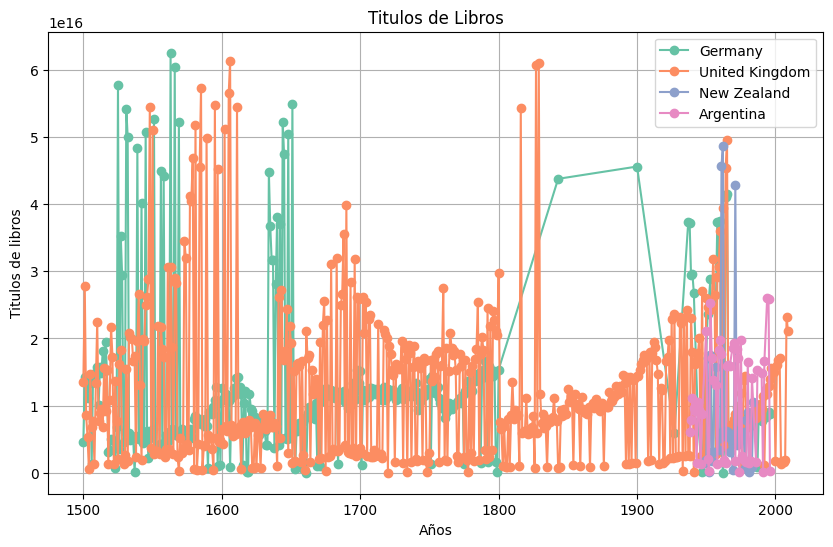

In [77]:
#Seleccion de paises de muestra
selected_countries = ["Germany", "United Kingdom", "New Zealand", "Argentina"]

plt.figure(figsize=(10,6))
for country in selected_countries:
    country_data = data[data['Entity'] == country]
    plt.plot(country_data['Year'], country_data["Book titles per capita (Fink-Jensen 2015)"], marker='o', label=country)

plt.title('Titulos de Libros')
plt.xlabel('Años')
plt.ylabel('Titulos de libros')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

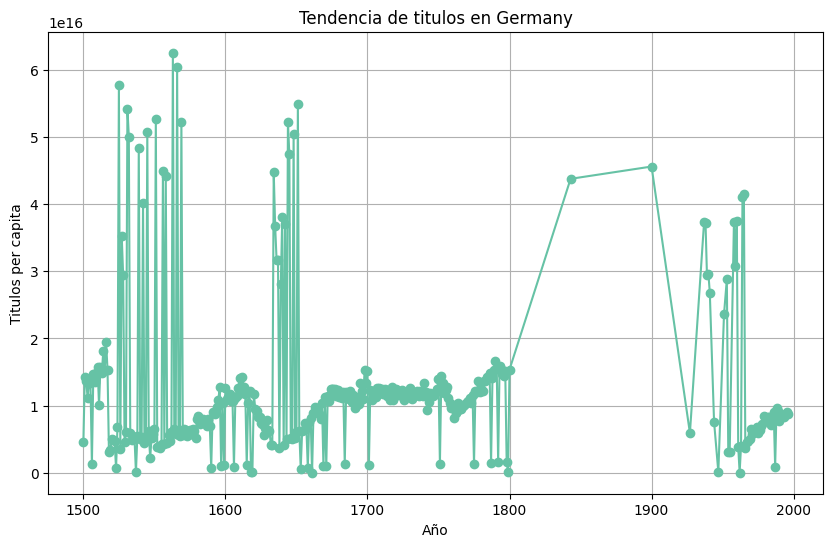

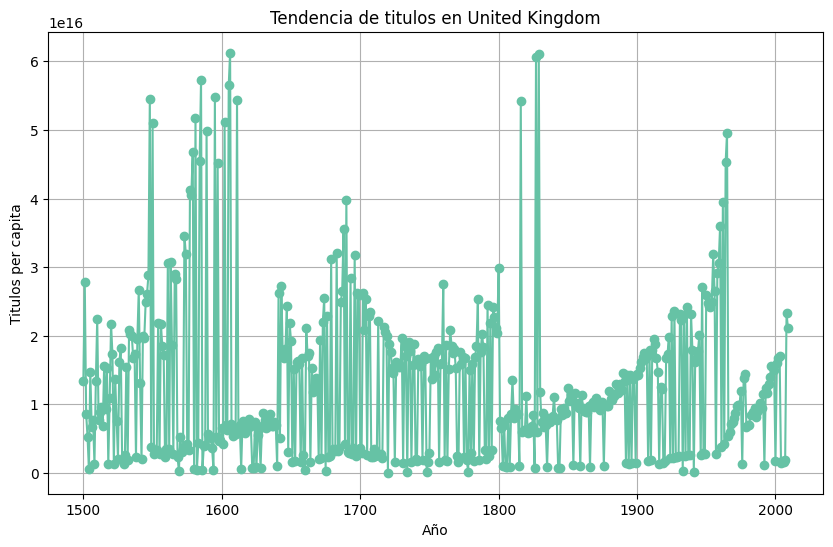

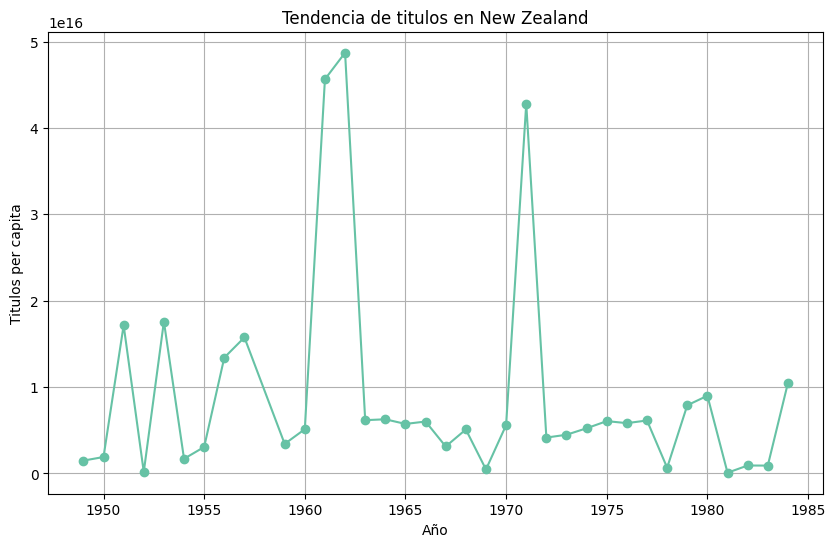

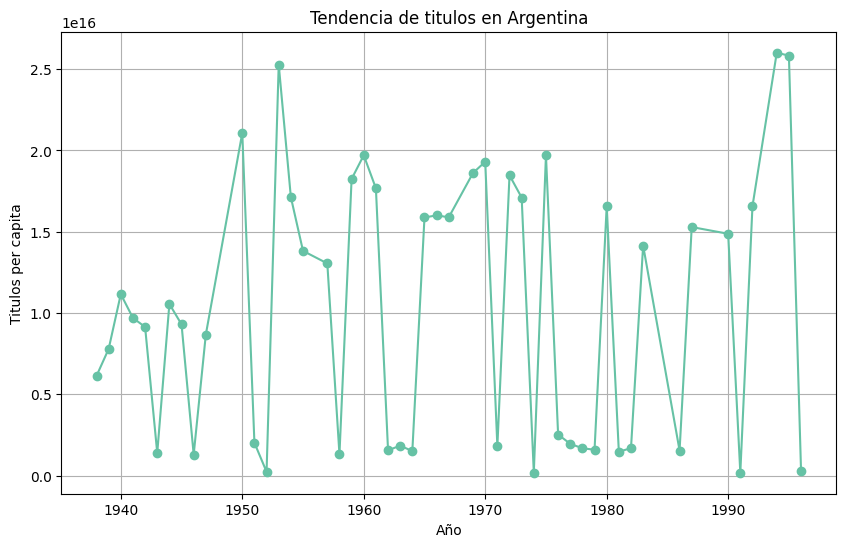

In [78]:
selected_countries = ["Germany", "United Kingdom", "New Zealand", "Argentina"]

# tendencia en los paises seleccionados
plt.figure(figsize=(12, 8))

for country in selected_countries:
    country_data = data[data['Entity'] == country]
    plt.figure(figsize=(10, 6))  # Se crea una figura por cada pais 
    plt.plot(country_data['Year'], country_data['Book titles per capita (Fink-Jensen 2015)'], marker='o')
    plt.title(f'Tendencia de titulos en {country}')
    plt.xlabel('Año')
    plt.ylabel('Titulos per capita')
    plt.grid(True)
    plt.show()

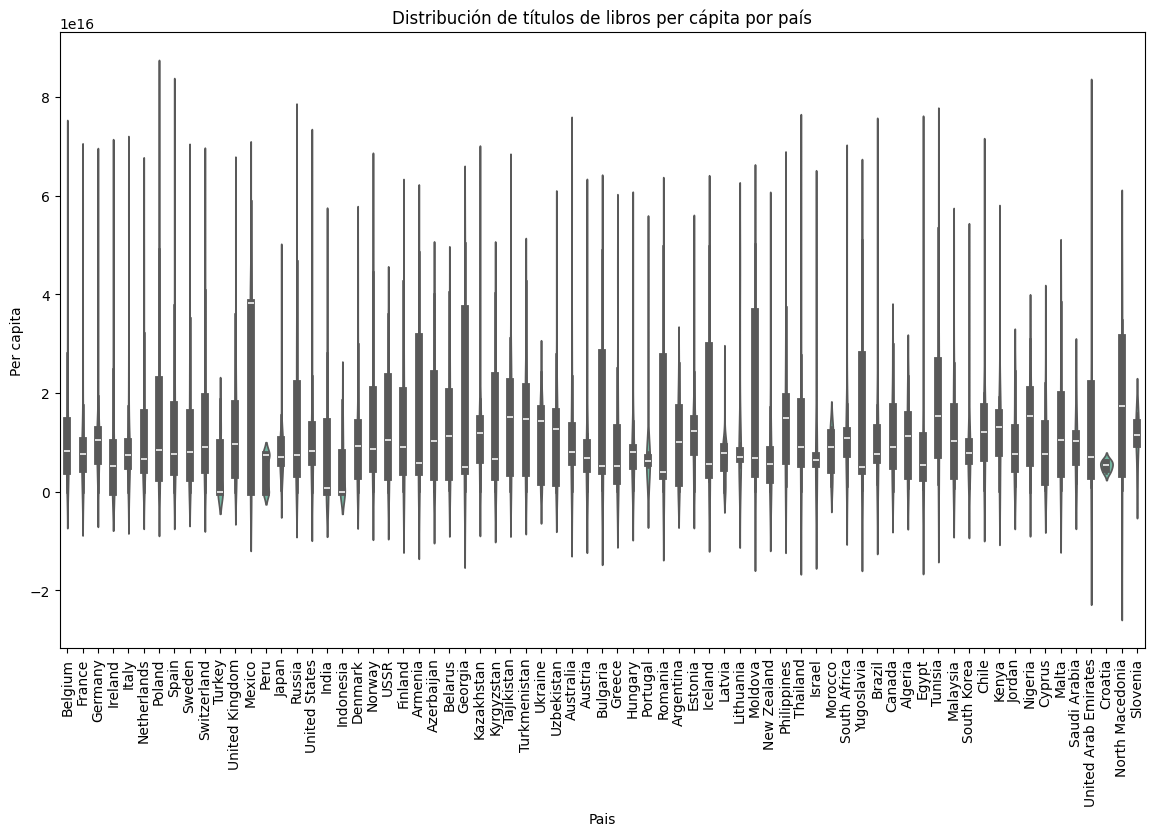

In [79]:
#Distribucion de titulos de libros per capita
plt.figure(figsize=(14,8))
sns.violinplot(data=data, x='Entity', y='Book titles per capita (Fink-Jensen 2015)')
plt.title('Distribución de títulos de libros per cápita por país')
plt.xlabel('Pais')
plt.ylabel('Per capita')
plt.xticks(rotation=90)
plt.show()

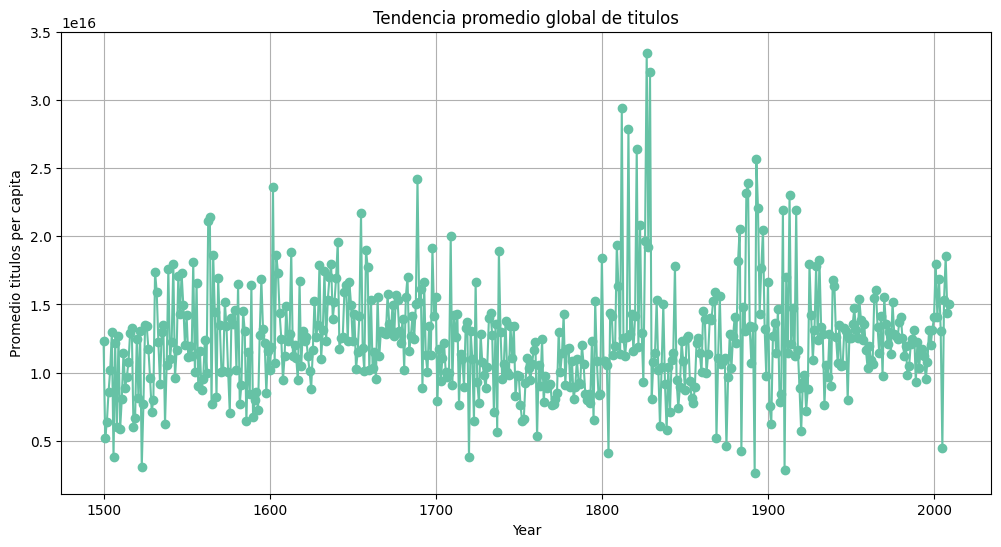

In [80]:
global_avg_titles_per_capital = data.groupby('Year')['Book titles per capita (Fink-Jensen 2015)'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(global_avg_titles_per_capital['Year'], global_avg_titles_per_capital['Book titles per capita (Fink-Jensen 2015)'], marker='o')
plt.title('Tendencia promedio global de titulos')
plt.xlabel('Year')
plt.ylabel('Promedio titulos per capita')
plt.grid(True)
plt.show()